# Курс "Программирование на языке Python. Уровень 4. Анализ и визуализация данных на языке Python. Библиотеки numpy, pandas, matplotlib"

## Модуль 3. Библиотека numpy и изображения, библиотека PIL

1. Загрузка, сохранение и обработка изображений с помощью библиотеки PIL
3. Перенос изображений из PIL в numpy и обратно
2. Загрузка датасета "Ирисы Фишера" в numpy, способы сделать классификатор ирисов методом поиска k ближайших соседей (kNN)

In [ ]:
# загрузите необходимые библиотеки
import numpy as np



### Решите следующие задачи

1. Решите одной строкой следующие простые задачи

In [ ]:
# создайте вектор целых чисел от 0 до 48

# преобразуйте его в матрицу размером 12x4

# преобразуйте эту матрицу в трехмерную матрицу размером 3x4x4

# посчитайте среднее значение в матрице на 2-м уровне по оси 1

# выведите все значения из матрицы, большие этого среднего

# замените все значения из 2-3 уровня по оси 2 на -1

# "раскатайте" матрицу обратно в вектор - с созданием и без создания копии


2 . Создайте квадратную матрицу размера NxN с единицами по границам и нолями внутри

In [ ]:
N = 10
# ваш код здесь


3 . Американские коллеги прислали архив с наблюдениями температуры, но вот незадача: температура там указана в Фаренгейтах. Формула для перевода: $\frac{C}{5}=\frac{F - 32}{9}$

In [ ]:
temps_F = np.array([0, 100, 99.1, 32, 44, 241, 10, 15, 20])
# ваш код здесь


4 . В заданном векторе длины M, содержащем случайные целые значения от 0 до N, замените максимальные значения на -1.

In [ ]:
M = input("Длина вектора: ")
N = input("Диапазон случайных чисел: ")
# ваш код здесь

 ## Визуализация массивов numpy
 
 Монохромные и цветные графические изображения - отличный пример использования библиотеки numpy для хранения и обработки данных. Для работы с изображениями используется библиотека ```PIL```, для визуализации можно использовать встроенную в jupyter notebook функцию ```display```.

In [ ]:
from PIL import Image
from PIL import ImageFilter
import os

lena = Image.open('lena.jpg')
display(lena)

print("Размеры изображения: {}x{}".format( *lena.size ))


In [ ]:
# некоторые полезные функции PIL, например, изменение размеров изображения
lena_big = lena.resize( (512, 512), Image.LANCZOS ) 
display(lena_big)

print("Размеры изображения: {}x{}".format( *lena_big.size ))


In [ ]:
# фильтры, например, повышение резкости
lena_sharpened = lena.filter(ImageFilter.SHARPEN)
display(lena)
display(lena_sharpened)


In [ ]:
# сохранение изображения
filename = 'lena_big.jpg'
with open(filename, 'xb' if not os.path.exists(filename) else 'wb') as f:
    lena_big.save(f)


In [ ]:
# преобразовать изображение в массив numpy
a_lena = np.array(lena)
a_lena

In [ ]:
# размеры получившегося тензора
print(a_lena.shape)
print(a_lena.min())
print(a_lena.max())
print(a_lena.dtype)

In [ ]:
# создание объекта Image из массива numpy
display(Image.fromarray(a_lena))

Размещение "тепловой карты" (heatmap) поверх изображения. Необходимость получения таких изображений возникает, например, при работе с нейросетями в задачах компьютеного зрения.

In [ ]:
lena_heat = Image.open('lena_heat_example.jpg')
display(lena_heat)

In [ ]:
# процесс наложения изображения
lena_w_heat = Image.blend(lena, lena_heat, 0.4)
display(lena_w_heat)

### Практика

1. Создайте цветное изображение размером 200х200 пикселей из массива numpy, разместите в его вехнем левом углу красный квадрат размером 100x100 пикселей, а в правом нижнем - синий квадрат размером 100x100 пикселей. Фон - белый.
2. Смените цвет квадрата внизу на зеленый (поменяйте местами каналы G и B)
3. Сохраните изображение.

In [ ]:
# ваш код здесь



### Загрузка данных в numpy на примере датасета "Ирисы"

Ирисы Фишера — это набор данных для задачи классификации, на примере которого Рональд Фишер в 1936 году продемонстрировал работу разработанного им метода дискриминантного анализа. 

Ирисы Фишера состоят из данных о 150 экземплярах ириса, по 50 экземпляров из трёх видов — Ирис щетинистый (Iris setosa), Ирис виргинский (Iris virginica) и Ирис разноцветный (Iris versicolor). Для каждого экземпляра измерялись четыре характеристики (в сантиметрах):

- Длина наружной доли околоцветника (англ. sepal length);
- Ширина наружной доли околоцветника (англ. sepal width);
- Длина внутренней доли околоцветника (англ. petal length);
- Ширина внутренней доли околоцветника (англ. petal width).

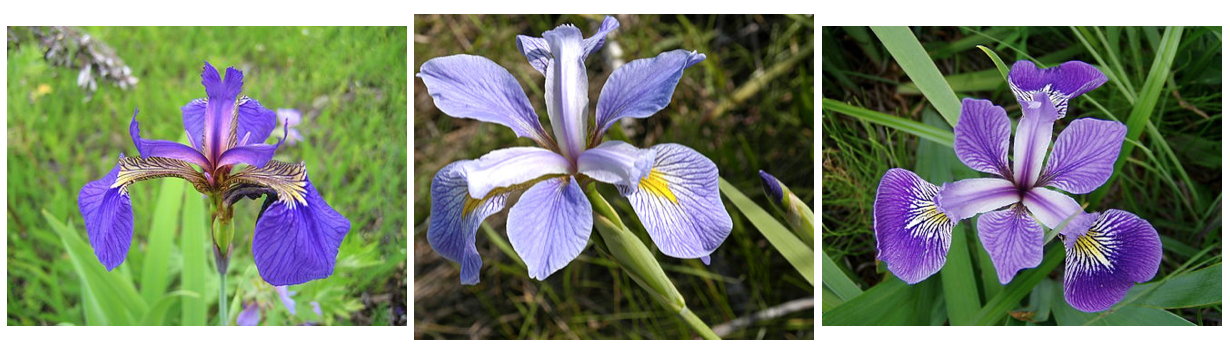


In [ ]:
# Загружаем dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = np.genfromtxt(url, delimiter=',', dtype='object')



#### Задание

Сформируйте определяющую ```X``` и результирующую ```y``` части датасета. Определяющая часть - матрица numpy размера 150x4, результируюцая - вектор признаков длиной 150.

Также создайте тестовый набор данных в виде матрицы X_test и вектора y_test длиной N, путем случайной выборки N случайных строк из изначально загруженного датасета. В данном случае будет достаточно решения для N=3.

In [ ]:
# ваш код здесь



Наша задача: написать функцию - классификатор, которая будет предсказывать принадлежность найденных нами ирисов этим трем классам. Классификатор будет принимать на вход матрицу, состоящую из векторов с соответствующими измерениями цветков и выдавать вектор принадлежности наших цветков этим классам.
Работать данный классификатор будет по методу поиска k ближайших соседей (kNN), буквально так:
 - для каждого из наших цветов 
     - посчитать евклидово расстояние $L_2\left( p,q\right)   = \sqrt {\sum _{i=1}^{n}  \left( q_{i}-p_{i}\right)^2 }$ до каждого ириса из датасета;
     - выбрать k ближайших (с минимальным расстоянием);
     - определить вероятность, посчитав соотношение классов k ближайших соседей.
 
Работу нужно выполнить тремя способами рассчета расстояния:
 - используя два вложенных цикла
 - используя один цикл
 - не используя циклы.
  

In [ ]:
def calc_dist_two_loops(X_test):
    """
    Данная функция возвращает матрицу расстояний от каждого вектора из X_test до каждого вектора из X, 
    выполняя вложенные циклы по X и X_test
    """
    # ваш код здесь
    pass
   
            
dists = calc_dist_two_loops(X_test)
print(dists)

In [ ]:
def calc_dist_one_loop(X_test):
    """
    Данная функция возвращает матрицу расстояний от каждого вектора из X_test до каждого вектора из X,
    выполняя один цикл по X_test
    """
    # ваш код здесь

dists = calc_dist_one_loop(X_test)
print(dists)

In [ ]:
def calc_dist_no_loop(X_test):
    """
    Данная функция возвращает матрицу расстояний от каждого вектора из X_test до каждого вектора из X,
    вообще не используя циклов
    """
    # вспомним разложение квадрата разности в квадратный многочлен
    # (x-y)^2 = x^2 + y^2 - 2xy
    # ваш код здесь

dists = calc_dist_no_loop(X_test)

In [ ]:
def predict_labels(X_test, k):
    """
    Эта функция возвращает массив меток классов для заданной выборки векторов X_test
    """
    dists = calc_dist_no_loop(X_test)

    # Используя матрицу расстояний, найдите k ближайших соседей для каждого вектора из X_test
    # Для полуения меток используйте вектор результирующих признаков y
    # Подсказка: используйте функцию numpy.argsort().
    
    # ваш код здесь
    
    pass
    
    
    
print(predict_labels(X_test, 1))
print(y_test)
